In [1]:
import numpy as np   # N-Dimensional arrays and numerical routines
import numba
import scipy         # Numerical routines

In [2]:
from scipy.stats import truncnorm

In [3]:
from sympy import *  # Symbolic mathematics
import sympy

In [4]:
from sympy import abc       # Symbolic variables
from sympy import pi as Pi  # Symbolic pi
from sympy import I as I    # Symbolic imaginary unit

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
sympy.interactive.printing.init_printing(use_latex='mathjax')

In [7]:
np.set_printoptions(precision=5, threshold=6, edgeitems=3, linewidth=75, 
                    suppress=False, nanstr=None, infstr=None, 
                    formatter=None)

In [38]:
from pychebfun import chebfun

# Adjusting force

$\mathbf{f}^{adj} = \frac{m}{\tau^{adj}} (v_{0} \cdot \hat{\mathbf{e}} -\mathbf{v}) $

# Social Force

$E(\tau) = \frac{k}{\tau^{2}} \exp \left( -\frac{\tau}{\tau_{0}} \right) $

In [47]:
tau_0 = 3
f = chebfun(lambda tau: np.exp(-tau/tau_0) / tau**2, domain=[0.1, 7])

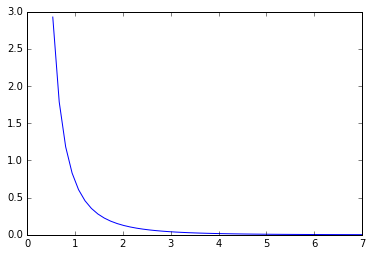

In [48]:
plt.plot(tau, f(tau))

In [9]:
def E(tau, tau_0):
    return np.exp(-tau/tau_0) / tau**2

In [29]:
tau_0 = 3
tau = np.linspace(0.4, 7)[1:]

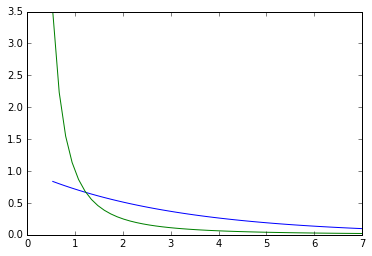

In [32]:
plt.plot(tau, np.exp(-tau/tau_0))
plt.plot(tau, 1/tau**2)

In [35]:
E(3, 3)

0.0408754934635

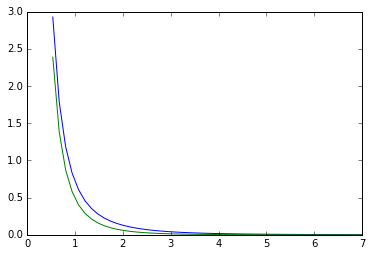

In [34]:
plt.plot(tau, E(tau, 3))
plt.plot(tau, E(tau, 1.4))

$ \mathbf{f}_{ij}^{pow} = - \left(\frac{k}{a \tau^{2}}\right) 
\left(\frac{2}{\tau} + \frac{1}{\tau_{0}}\right) 
\exp\left (-\frac{\tau}{\tau_{0}}\right )
\left(\mathbf{v}_{ij} -\frac{a \mathbf{x}_{ij} + b \mathbf{v}_{ij}}{d} \right) $

$ a = \mathbf{v}_{ij} \cdot \mathbf{v}_{ij}, \quad b = -\mathbf{x}_{ij} \cdot \mathbf{v}_{ij},\quad c = \mathbf{x}_{ij} \cdot \mathbf{x}_{ij} - r_{ij}^{2}, \quad d = \sqrt{b^{2} - a c} $

$\tau = \frac{b - d}{a}$

In [ ]:
x = symbols('\|x\|', real=True, positive=True)
v = symbols('\|v\|', real=True, positive=True)
r = symbols('r', real=True, positive=True)
theta = symbols('theta', real=True)

In [ ]:
a = v**2
b = - x * v * cos(theta)
c = x**2 - r**2

In [ ]:
d = simplify(sqrt(b**2 - a * c))

In [ ]:
tau = simplify((b - d) / a)

In [ ]:
a, b, c, d

In [ ]:
tau

$\tau$ undefined

In [ ]:
tau.subs(theta, Pi/2)

$\tau_{min}$

In [ ]:
tau.subs(theta, -Pi)

# Contact Force

$ \mathbf{f}_{ij}^{c} = 
h_{ij} \cdot \left(\mu \cdot \hat{\mathbf{n}}_{ij} - \kappa \cdot \left(\mathbf{v}_{ji} \cdot \hat{\mathbf{t}}_{ij}\right) \hat{\mathbf{t}}_{ij}\right), \quad h_{ij} > 0 $

# Random fluctuation

$ \boldsymbol{\xi}_{i} = f \left[\begin{matrix}\cos{\left (\theta \right )} \quad \sin{\left (\theta \right )}\end{matrix}\right] \quad f \in \mathcal{N}(0, f_{max}), \quad \theta \in [0, 2\pi] $